In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import seaborn as sns
import io
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm 

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Age - возраст
# Experience - стаж работы
# Income - годовой доход
# ZIP Code - почтовый индекс домашнего адреса
# Family - количество членов семьи
# CCAvg - средние траты в месяц с карты 
# Education - уровень образования (1-среднее, 2-высшее незаконченное, 3 - высшее полное)
# Mortgage - наличие ипотеки и сумма, если она есть 
# Personal Loan - есть ли кредит, предложенный на индивидуальных условиях
# Securities Account - есть ли счет в ценных бумагах
# CD Account - есть ли депозитный счет
# Online - пользуется ли опрашиваемый онлайн приложением банка 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/BankPersonalLoanModelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
# я буду рассматаривать как средние траты за месяц зависят от уровня образования, 
# возраста, стажа работы и наличия депозитного аккаунта в банке

$$CCAvg = \beta_0 + \beta_1*Education+ \beta_2*Age + \beta_3*Experience + \beta_4*CDAccount$$

In [5]:
df_new = df.rename(columns={'CD Account' : 'CDAccount'})
df_new

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
# отобразим зависимость на графиках

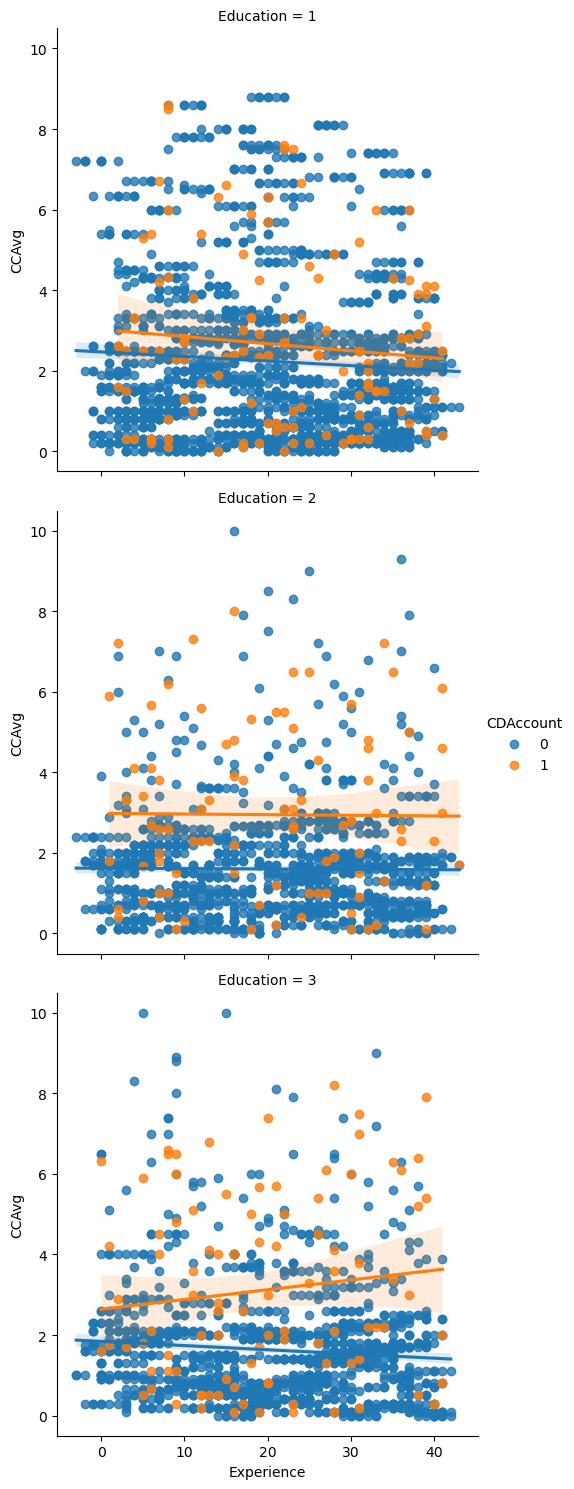

In [7]:
sns.lmplot(x='Experience', y='CCAvg', data=df_new, hue='CDAccount', row='Education')

In [8]:
# рассмотрим влияние каждого из компонентов зависмости на показатель ежемесячных средних трат с карты 

In [9]:
fitted_line = smf.ols(formula='CCAvg~Education+Age+Experience+CDAccount', data=df_new).fit()
fitted_line.params.round(2)

Intercept     1.88
Education    -0.30
Age           0.03
Experience   -0.04
CDAccount     1.02
dtype: float64

$$ CCAvg= 1.88 - 0.3*Education + 0.03*Age - 0.04*Experience + 1.02*CDAccount $$
###### соответственно, исходя из полученных данных можно прийти к выводу, что с изменением уровня образования от среднего к высшему количество потраченных денег на карте в месяц уменьшается на 300 долларов, с увлечиненм возраста на 1 год данный показатель увеличивается на 30 долларов, с увеличением рабочего стажа на год траты с карты уменьшаются на 40 долларов и при наличии депозита в банке траты в целом увеличиваются на 1020 долларов

In [10]:
# рассмторим некоторые зависимости на графиках

In [67]:
sns.regplot(data = df_new, y = 'CCAvg' ,x = 'Education' , order = 1, ci = None ,  line_kws = { "color":"green"}) 
print('Подогнанная прямая') 

SyntaxError: positional argument follows keyword argument (804466826.py, line 1)

###### исходя из графика можно отметить, что на первый взгляд разница между людьми со срденим и высшим образованием в тратах несущсетвенна, но все же она присутствует, люди с высшим образованием тратят чуть меньше тех, кто его не получил (это подтверждается и данными сверху)

Подогнанная прямая


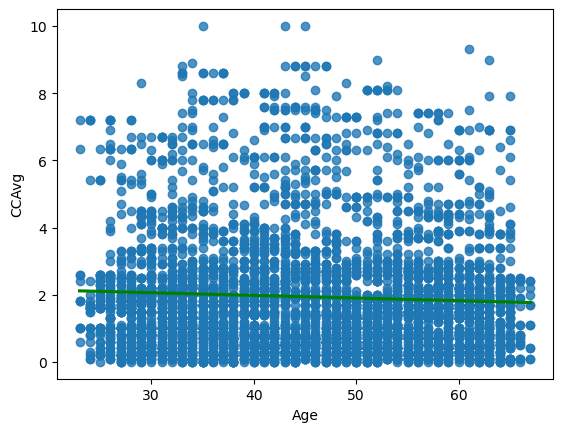

In [69]:
sns.regplot(data = df_new, y = 'CCAvg' ,x = 'Age' ,order = 1, ci = None ,  line_kws = { "color":"green"}) 
print('Подогнанная прямая') 

In [13]:
# определим, какие элементы регрессии являются значимыми, при уровне значимсоти 5%

In [14]:
model = smf.ols(data=df_new, formula='CCAvg~Education+Age+Experience+CDAccount').fit()
model.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8766,0.508,3.694,0.000,0.881,2.872
Education,-0.2967,0.030,-9.924,0.000,-0.355,-0.238
Age,0.0280,0.020,1.372,0.170,-0.012,0.068
Experience,-0.0354,0.020,-1.737,0.082,-0.075,0.005
CDAccount,1.0229,0.102,10.057,0.000,0.824,1.222


In [15]:
alpha = 0.05
t_cr=stats.t.ppf(1-alpha/2, 5000-1-4)
t_cr.round(3)

1.96

In [16]:
data_string = '''	coef	std.err	t	P>|t|	[0.025	0.975]
Intercept	1.8766	0.508	3.694	0.000	0.881	2.872
Education	-0.2967	0.030	-9.924	0.000	-0.355	-0.238
Age	0.0280	0.020	1.372	0.170	-0.012	0.068
Experience	-0.0354	0.020	-1.737	0.082	-0.075	0.005
CDAccount	1.0229	0.102	10.057	0.000	0.824	1.222
'''

In [17]:
df_string = pd.read_csv(io.StringIO(data_string), sep='\s+')
df_string 

,coef,std.err,t,P>|t|,[0.025,0.975]
Intercept,1.8766,0.508,3.694,0.000,0.881,2.872
Education,-0.2967,0.030,-9.924,0.000,-0.355,-0.238
Age,0.0280,0.020,1.372,0.170,-0.012,0.068
Experience,-0.0354,0.020,-1.737,0.082,-0.075,0.005
CDAccount,1.0229,0.102,10.057,0.000,0.824,1.222


In [18]:
df_string['result'] = df_string.apply(lambda x: 'значимо' if abs(x['t'])>t_cr else 'не значимо',axis=1)
df_string

,coef,std.err,t,P>|t|,[0.025,0.975],result
Intercept,1.8766,0.508,3.694,0.000,0.881,2.872,значимо
Education,-0.2967,0.030,-9.924,0.000,-0.355,-0.238,значимо
Age,0.0280,0.020,1.372,0.170,-0.012,0.068,не значимо
Experience,-0.0354,0.020,-1.737,0.082,-0.075,0.005,не значимо
CDAccount,1.0229,0.102,10.057,0.000,0.824,1.222,значимо


###### получаем, что налчиие депозита в банке (CDAccount) и уровень образования (Education) являются значимыми переменными для данной регрессии 

In [19]:
# определим значимость заданной регрессии (совместнуюзначимость коэффициентов)

$$ H_0 : \beta_{Education}=\beta_{Age}=\beta_{Experience}=\beta_{CDAccount} = 0 $$
$$ H_1 : \beta_{Education}=\beta_{Age}=\beta_{Experience}=\beta_{CDAccount} ≠ 0 $$

In [20]:
R2 = fitted_line.rsquared
R2.round(3)

0.041

In [21]:
R2adj = 1 - (1-R2)*(len(df_new)-1)/(len(df_new)-4-1)
R2adj.round(3)

0.04

In [22]:
F_obs = fitted_line.fvalue
F_obs.round(2)

52.75

In [23]:
alpha = 0.05 
F_cr = stats.f.ppf(1-alpha,4,5000-5)
F_cr.round(2)

2.37

$$ F_{cr}<F_{obs} \Rightarrow H_0 $$ $$ отвергаем $$

###### значит выбранные регресссоры в действительности описывают модель и являются совместно значимыми

In [24]:
# проверим регрессию на значимость структурных сдвигов в зависимости от уровня образования 

In [25]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/BankPersonalLoanModelling.csv')
df = loan_df.rename(columns={'CD Account' : 'CDAccount'})
df
df_1 = df[df['Education']==1] 
df_3 = df[df['Education']==3] 

In [26]:
df_1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
14,15,67,41,112,91741,1,2.00,1,0,0,1,0,0,0
17,18,42,18,81,94305,4,2.40,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,4984,51,26,72,95370,1,2.90,1,0,0,0,0,0,0
4988,4989,34,8,85,95134,1,2.50,1,136,0,0,0,0,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0


In [27]:
df_3.shape

(1501, 14)

In [28]:
model = smf.ols(data= df, formula='CCAvg~Education+Age+Experience+CDAccount').fit()
model1 = smf.ols(data= df_1, formula='CCAvg~Education+Age+Experience+CDAccount').fit()
model3 = smf.ols(data= df_3, formula='CCAvg~Education+Age+Experience+CDAccount').fit()

In [29]:
F_nab = (model.ssr - (model1.ssr + model3.ssr))/((model1.ssr + model3.ssr))*((len(df_1)+len(df_3)-2*5)/(5))
F_nab.round(2)

174.54

In [30]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,5,len( df_3 ) + len( df_1 ) - 10  )
F_cr.round(2)

2.22

$$ F_{cr}<F_{nab} \Rightarrow $$ 
##### структурные изменения значимы 

In [31]:
# проверим регрессию на значимость структурных сдвигов в зависимости от наличия депозитного аккаунта в банке

In [32]:
df
df_yes = df[df['CDAccount']==1] 
df_no = df[df['CDAccount']==0] 

In [33]:
model = smf.ols(data= df, formula='CCAvg~Education+Age+Experience+CDAccount').fit()
model1 = smf.ols(data= df_yes, formula='CCAvg~Education+Age+Experience+CDAccount').fit()
model2 = smf.ols(data= df_no, formula='CCAvg~Education+Age+Experience+CDAccount').fit()

In [34]:
F_nab = (model.ssr - (model1.ssr + model2.ssr))/((model1.ssr + model2.ssr))*((len(df_yes)+len(df_no)-2*5)/(5))
F_nab.round(2)

4.29

In [35]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,5,len( df_yes ) + len( df_no ) - 10  )
F_cr.round(2)

2.22

$$ F_{cr}<F_{nab} \Rightarrow $$ 
##### структурные изменения значимы 

In [36]:
# построим доверительный интервал для каждой из переменных регрессии 

In [37]:
data_string = '''
Intercept	1.8766	0.508
Education	-0.2967	0.030
Age	0.0280	0.020
Experience	-0.0354	0.020
CDAccount	1.0229	0.102
'''

In [38]:
np.reshape(data_string.strip().split(), (5,3) )

array([['Intercept', '1.8766', '0.508'],
       ['Education', '-0.2967', '0.030'],
       ['Age', '0.0280', '0.020'],
       ['Experience', '-0.0354', '0.020'],
       ['CDAccount', '1.0229', '0.102']], dtype='<U10')

In [39]:
df = pd.DataFrame(np.reshape(data_string.strip().split(), (5,3) ), columns=['name','estimate','std.err'])
df

,name,estimate,std.err
0,Intercept,1.8766,0.508
1,Education,-0.2967,0.030
2,Age,0.0280,0.020
3,Experience,-0.0354,0.020
4,CDAccount,1.0229,0.102


In [40]:
df['Estimate_numb'] = df['estimate'].str.extract(r'([-+]?\d+.\d+)').astype(float)
df['Std.error_numb'] = df['std.err'].str.extract(r'([-+]?\d+.\d+)').astype(float)
df

,name,estimate,std.err,Estimate_numb,Std.error_numb
0,Intercept,1.8766,0.508,1.8766,0.508
1,Education,-0.2967,0.030,-0.2967,0.030
2,Age,0.0280,0.020,0.0280,0.020
3,Experience,-0.0354,0.020,-0.0354,0.020
4,CDAccount,1.0229,0.102,1.0229,0.102


In [41]:
alpha = 0.05
t_cr = stats.t.ppf (1-alpha/2, 5000-5)
t_cr.round(3)

1.96

In [42]:
df['low'] = df['Estimate_numb'] - t_cr*df['Std.error_numb']
df['up'] = df['Estimate_numb'] + t_cr*df['Std.error_numb']
df.round(2)

,name,estimate,std.err,Estimate_numb,Std.error_numb,low,up
0,Intercept,1.8766,0.508,1.88,0.51,0.88,2.87
1,Education,-0.2967,0.030,-0.30,0.03,-0.36,-0.24
2,Age,0.0280,0.020,0.03,0.02,-0.01,0.07
3,Experience,-0.0354,0.020,-0.04,0.02,-0.07,0.00
4,CDAccount,1.0229,0.102,1.02,0.10,0.82,1.22


In [43]:
# сделаем прогнозирование для возможных 3-х опрашиваемых
# 1. в возрасте 25 лет, имеет высшее образование, не имеет депозитного счета в банке, стаж 3 года
# 2. в возрасте 60 лет, имеет высшее образование, имеет депозитный счет в банке, стаж 40 лет
# 3. в возрасте 40 лет, имеет среднее образование, имеет в банке депозитный счет, стаж 10 лет

In [44]:
CCAvg  = pd.DataFrame({'Age':[25 ,  60 ,  40],  'Education':[3 ,  3,  1],  'CDAccount':[ 0 ,  1 ,  1 ],  'Experience':[3 , 40,  10]}) 
CCAvg

,Age,Education,CDAccount,Experience
0,25,3,0,3
1,60,3,1,40
2,40,1,1,10


In [45]:
fitted = smf.ols(data=df_new, formula='CCAvg~Education+Age+Experience+CDAccount').fit()

In [46]:
CCAvg = fitted.predict(exog = CCAvg)
CCAvg

0    1.580020
1    2.273433
2    3.368599
dtype: float64

In [47]:
np.exp(CCAvg).round(2)

0     4.86
1     9.71
2    29.04
dtype: float64

###### исходя из проведенного исследования больше всего ежемесячных трат будет осуществлять 3-й человек (гипотеза о том, что чем ниже уровень образования у человека, тем больше он тратит подтвердилась :) ) 


In [48]:
# построим матрицу корреляций 

In [49]:
df = df_new[['Education', 'Age', 'CDAccount', 'Experience']].copy()
corr_matrix = df.corr().round(3)
corr_matrix

,Education,Age,CDAccount,Experience
Education,1.000,0.041,0.014,0.013
Age,0.041,1.000,0.008,0.994
CDAccount,0.014,0.008,1.000,0.010
Experience,0.013,0.994,0.010,1.000


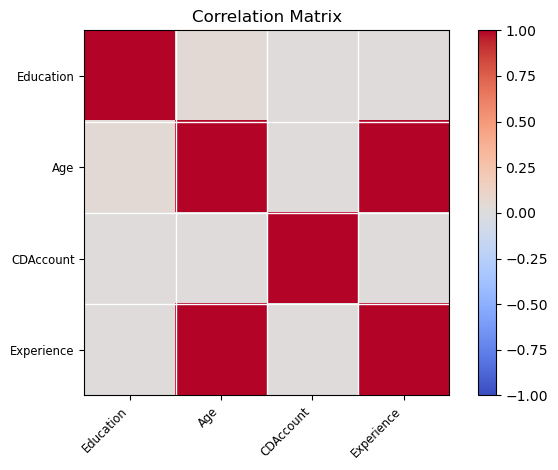

In [50]:
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, cmap='coolwarm')
plt.show()

###### наблюдается положительная корреляция между age и experience, эти регрессоры имеют бОльшую взаимосвзяь друг с другом, что имеет вполне логичное объяснение, так как с возрастом наш стаж работы увеличивается, как показано ниже чем старше человек, тем выше его стаж  (на 0,99 с каждым годом, при прочих равных)

In [51]:
fitted = smf.ols(data=df, formula='Experience~Age').fit()
fitted.params

Intercept   -24.990339
Age           0.994630
dtype: float64

In [52]:
# проведем Reset-тест

In [80]:
model = smf.ols (data=df_new, formula ='CCAvg~Education+Age+Experience+CDAccount').fit()
hat_CCAvg = model.predict()

In [81]:
df_new['CCAvg2'] = hat_CCAvg**2
df_new['CCAvg3'] = hat_CCAvg**3
df_new

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CDAccount,Online,CreditCard,CCAvg2,CCAvg3
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,5.036725,11.303746
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,4.696729,10.178721
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,4.582923,9.811012
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,3.780601,7.350912
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,3.919456,7.759589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,2.862835,4.843892
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,5.189624,11.822350
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,1.876603,2.570743
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,2.846746,4.803115


In [82]:
model_new = smf.ols (data=df_new, formula='CCAvg~Education+Age+Experience+CDAccount+CCAvg2+CCAvg3').fit()

In [83]:
R_un = model_new.rsquared
R_res = model.rsquared

In [84]:
F_ob = (R_un-R_res)/(1-R_un)*(len(df)-12)/3
F_ob.round(3)

7.85

In [85]:
alpha = 0.05
stats.f.ppf(1-0.05,2,len(df)-7).round(3)

2.998

$$ F_{cr} < F_{ob} \Rightarrow $$ 
###### регрессия не согласуется с данными, соответсвенно, в придуманной мной модели учтены не все показатели, оказывающие влияние на результат

In [86]:
# проведем также тест Дарбина-Уотсона

In [87]:
res_sum = sum(model.resid**2)

In [88]:
sum_resid = 0
for i in range(len(model.resid)-1):
    sum_resid+=(model.resid[i+1]-model.resid[i])**2

In [89]:
from statsmodels.stats.stattools import durbin_watson
DW = durbin_watson(model.resid)
DW.round(3)

1.972

###### исходя из таблицы критических значений полученное значение теста находится в зоне неопределенности

###### Таким образом, можно прийти к выводу, что составленная мной модель не имеет противоречащих друг другу регрессоров, она имеет место существоаать, но важно отметить, что моя модель не является исчерпывающей, так как не включает в себя все показатели, влияющие на результат
###### Тест Дарбина-Уотсона не помог определить наличие автокорреляции в модели, так как значение попало в зону неопределенности 
###### Также мложно отметить высокую взаимосвязанность переменных возраста и стажа работы, которая была выявлена с помощью матрицы корреляций 
###### Из рассмотренных мною регрессоров наибольшее влияние оказывает наличие депозитного счета в банке, а также возраст, данные показатели значительно увеличивают уровень ежемесячных трат с карты, остальные регрессоры, наоборот, уменьшают траты

In [90]:
# 1

In [91]:
#2

In [92]:
fitted_line = smf.ols(formula='CCAvg~-1+Education+Age+Experience+CDAccount', data=df_new).fit()
fitted_line.params.round(2)

Education    -0.31
Age           0.10
Experience   -0.11
CDAccount     1.04
dtype: float64

In [93]:
#3

In [95]:
model = smf.ols(formula='CCAvg~Education+np.log(Age)+Experience+CDAccount', data=df_new).fit()
model.params.round(2)

Intercept     -1.57
Education     -0.30
np.log(Age)    1.25
Experience    -0.04
CDAccount      1.02
dtype: float64

- при изменении возраста на 1%, средние ежемесячные траты увеличиваются на 0.79

In [77]:
# 4 

In [99]:
data = df_new
data.head

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CDAccount,Online,CreditCard,CCAvg2,CCAvg3
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,5.036725,11.303746
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,4.696729,10.178721
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,4.582923,9.811012
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,3.780601,7.350912
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,3.919456,7.759589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,2.862835,4.843892
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,5.189624,11.822350
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,1.876603,2.570743
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,2.846746,4.803115
